- *차원 축소 = 특성 축소*

In [1]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
pca.components_.shape

(50, 10000)

In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

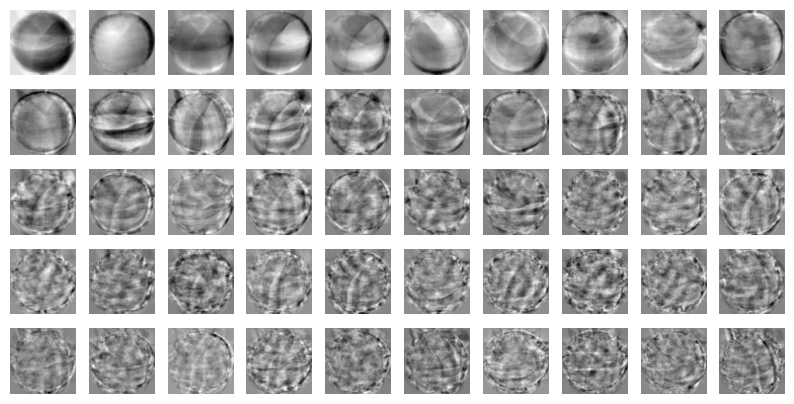

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

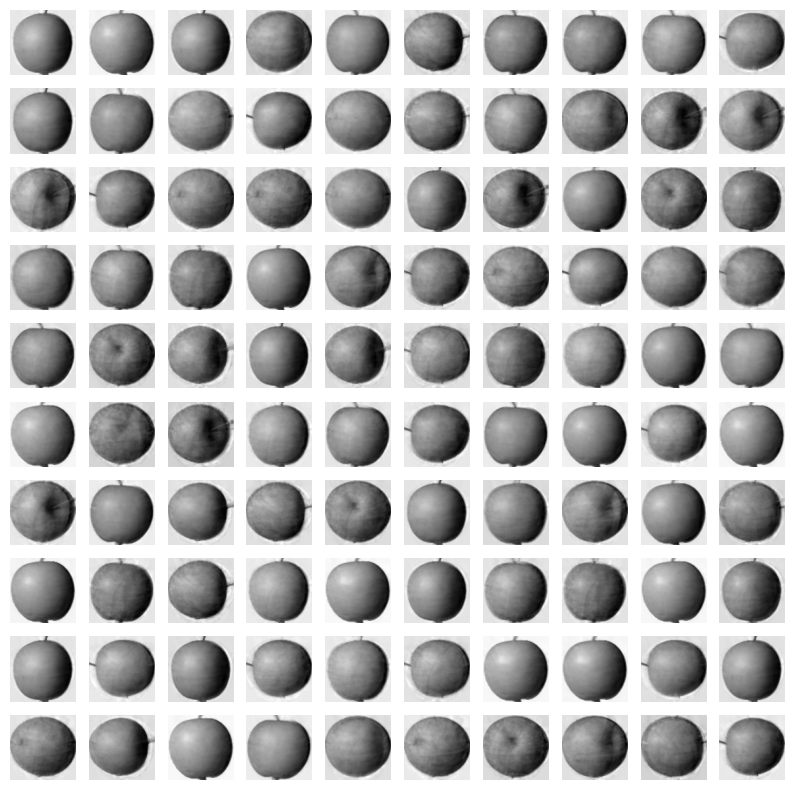

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[:100])

In [13]:
pca.explained_variance_ratio_.sum() # 원본의 92%

np.float64(0.921539569989569)

In [15]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486383, 0.00480347,
       0.00447837, 0.00437315, 0.00408032, 0.0038947 , 0.00372444,
       0.00359291, 0.0033147 , 0.00317812, 0.00304269, 0.0030375 ,
       0.00288818, 0.00275793, 0.00264874, 0.00255693, 0.00251902,
       0.00247426, 0.00239342, 0.00231005, 0.00221358, 0.00216399,
       0.00214071, 0.00195949, 0.00192931, 0.00190668, 0.00184618,
       0.00180011, 0.00174372, 0.00167998, 0.00163413, 0.001596  ])

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 +[2]*100)

In [21]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.19683027, 0.13030148, 0.12753177, 0.13465667, 0.13422799]), 'score_time': array([0.00182104, 0.00175118, 0.00175786, 0.0017364 , 0.00180578]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [22]:
scores = cross_validate(lr, fruits_pca, target) # 결과는 비슷한데 시간이 더 빠름
print(scores)

{'fit_time': array([0.00683832, 0.00637388, 0.0065577 , 0.00831676, 0.01012874]), 'score_time': array([0.00056982, 0.0005157 , 0.00058699, 0.00054169, 0.00053024]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [24]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components_

np.int64(2)

In [25]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [26]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([0.0420382 , 0.01755285, 0.01648593, 0.01140308, 0.02033782]),
 'score_time': array([0.00109005, 0.00050688, 0.00047088, 0.00049663, 0.00044417]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [28]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

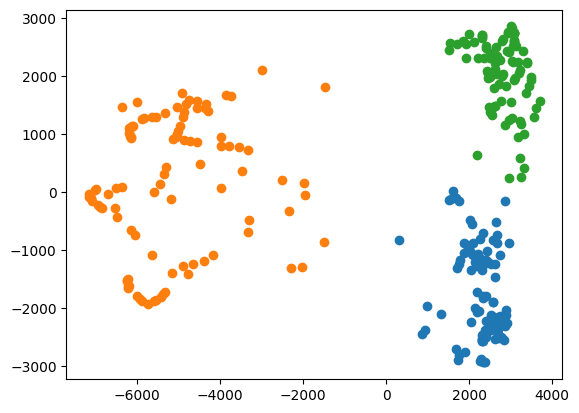

In [29]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])